<a href="https://colab.research.google.com/github/Fahad-Blog/Data-Science-Portfolio/blob/main/Data_Science_Step_by_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a Random Dataset

In [139]:
import pandas as pd
import numpy as np
import random

# Setting a seed for reproducibility
np.random.seed(42)

# Generating synthetic data
data = {
    'Transaction_ID': range(101, 121),
    'Date': pd.date_range(start='2023-10-01', periods=20),
    'Product_Category': [random.choice(['Clothing', 'Accessories', 'Footwear', np.nan]) for _ in range(20)],
    'Units_Sold': [random.randint(1, 10) if random.random() > 0.1 else np.nan for _ in range(20)],
    'Unit_Price': [round(random.uniform(15.0, 100.0), 2) for _ in range(20)],
    'Customer_Rating': [random.randint(1, 5) for _ in range(20)]
}

df = pd.DataFrame(data)

# Intentionally making one column a string that should be a number
df['Unit_Price'] = df['Unit_Price'].astype(str)

print("Dataset Created Successfully!")

Dataset Created Successfully!


As a beginner, your goal is Data Auditing. Before you even calculate the average sales, you need to know the "shape" of your data.

Perform the following tasks:

1.   Dimensions: Check how many rows and columns are in the dataset.
2.   The "Quick Look": Display the first 5 rows and the last 3 rows.
3. Data Integrity: Use a single command to find out
  Which columns have missing (NaN) values and the data types
6. Descriptive Stats: Generate summary statistics (mean, min, max) for the numerical columns.


Note: Pay close attention to the Unit_Price column. Does it show up in your summary statistics? If not, why?

In [140]:
#Task 1
df.shape

(20, 6)

In [141]:
#Task 2
df.head(5)

,Transaction_ID,Date,Product_Category,Units_Sold,Unit_Price,Customer_Rating
0,101,2023-10-01,Clothing,7.0,53.33,4
1,102,2023-10-02,Clothing,8.0,66.03,4
2,103,2023-10-03,Clothing,10.0,72.69,3
3,104,2023-10-04,Accessories,7.0,52.67,3
4,105,2023-10-05,Clothing,NaN,78.47,5


In [142]:
#Task 2
df.tail(3)

,Transaction_ID,Date,Product_Category,Units_Sold,Unit_Price,Customer_Rating
17,118,2023-10-18,Clothing,9.0,91.03,2
18,119,2023-10-19,Accessories,NaN,33.58,2
19,120,2023-10-20,Footwear,8.0,37.2,1


In [143]:
#Task 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    20 non-null     int64         
 1   Date              20 non-null     datetime64[ns]
 2   Product_Category  15 non-null     object        
 3   Units_Sold        17 non-null     float64       
 4   Unit_Price        20 non-null     object        
 5   Customer_Rating   20 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.1+ KB


In [144]:
#Task 4

df.describe()

,Transaction_ID,Date,Units_Sold,Customer_Rating
count,20.00000,20,17.000000,20.000000
mean,110.50000,2023-10-10 12:00:00,7.529412,3.600000
min,101.00000,2023-10-01 00:00:00,4.000000,1.000000
25%,105.75000,2023-10-05 18:00:00,7.000000,2.750000
50%,110.50000,2023-10-10 12:00:00,8.000000,4.000000
75%,115.25000,2023-10-15 06:00:00,9.000000,5.000000
max,120.00000,2023-10-20 00:00:00,10.000000,5.000000
std,5.91608,NaN,1.874755,1.391705


In [145]:
df['Units_Sold'] = df['Units_Sold'].fillna(df['Units_Sold'].median())

In [146]:
print("The Info of the dataset after filling the null values in Units_solds\n")

print(df.info())

The Info of the dataset after filling the null values in Units_solds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    20 non-null     int64         
 1   Date              20 non-null     datetime64[ns]
 2   Product_Category  15 non-null     object        
 3   Units_Sold        20 non-null     float64       
 4   Unit_Price        20 non-null     object        
 5   Customer_Rating   20 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.1+ KB
None


In [147]:
df['Product_Category'] = df['Product_Category'].fillna('Uncategorized')
print(f"Info after filling the null value in the Product Category columns \n {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    20 non-null     int64         
 1   Date              20 non-null     datetime64[ns]
 2   Product_Category  20 non-null     object        
 3   Units_Sold        20 non-null     float64       
 4   Unit_Price        20 non-null     object        
 5   Customer_Rating   20 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.1+ KB
Info after filling the null value in the Product Category columns 
 None


In [148]:
df['Unit_Price'] = pd.to_numeric(df['Unit_Price'], errors='coerce')
df['Total_Revenue'] = df['Units_Sold'] * df['Unit_Price']
df['Total_Revenue'] = pd.to_numeric(df['Total_Revenue'],errors = 'coerce')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    20 non-null     int64         
 1   Date              20 non-null     datetime64[ns]
 2   Product_Category  20 non-null     object        
 3   Units_Sold        20 non-null     float64       
 4   Unit_Price        20 non-null     float64       
 5   Customer_Rating   20 non-null     int64         
 6   Total_Revenue     20 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.2+ KB


In [150]:
high_value_sales =df[df['Total_Revenue']>100].sort_values(by='Total_Revenue',ascending=False)
print(f"The High Value Sales are \n")
high_value_sales

The High Value Sales are 



,Transaction_ID,Date,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue
17,118,2023-10-18,Clothing,9.0,91.03,2,819.27
9,110,2023-10-10,Footwear,9.0,83.05,5,747.45
2,103,2023-10-03,Clothing,10.0,72.69,3,726.90
6,107,2023-10-07,Uncategorized,9.0,70.58,4,635.22
4,105,2023-10-05,Clothing,8.0,78.47,5,627.76
1,102,2023-10-02,Clothing,8.0,66.03,4,528.24
13,114,2023-10-14,Clothing,8.0,65.20,5,521.60
8,109,2023-10-09,Footwear,8.0,51.40,1,411.20
7,108,2023-10-08,Uncategorized,8.0,49.43,5,395.44
12,113,2023-10-13,Footwear,9.0,43.65,3,392.85


In [151]:
high_value_sales_top3 =df[df['Total_Revenue']>100].sort_values(by=['Customer_Rating','Total_Revenue'],ascending=False).head(3)

In [152]:
high_value_sales_top3

,Transaction_ID,Date,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue
9,110,2023-10-10,Footwear,9.0,83.05,5,747.45
4,105,2023-10-05,Clothing,8.0,78.47,5,627.76
13,114,2023-10-14,Clothing,8.0,65.20,5,521.60


In [153]:
grouped_df = df.groupby('Product_Category').agg({'Total_Revenue':'sum','Customer_Rating':'mean','Units_Sold':'sum'})
grouped_df

,Total_Revenue,Customer_Rating,Units_Sold
Product_Category,,,
Accessories,1009.23,2.333333,20.0
Clothing,3891.92,4.000000,57.0
Footwear,2168.40,2.800000,44.0
Uncategorized,2008.74,4.600000,31.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    20 non-null     int64         
 1   Date              20 non-null     datetime64[ns]
 2   Product_Category  20 non-null     object        
 3   Units_Sold        20 non-null     float64       
 4   Unit_Price        20 non-null     float64       
 5   Customer_Rating   20 non-null     int64         
 6   Total_Revenue     20 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.2+ KB


In [155]:
df.set_index('Date',inplace=True)
df.head()

,Transaction_ID,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue
Date,,,,,,
2023-10-01,101,Clothing,7.0,53.33,4,373.31
2023-10-02,102,Clothing,8.0,66.03,4,528.24
2023-10-03,103,Clothing,10.0,72.69,3,726.90
2023-10-04,104,Accessories,7.0,52.67,3,368.69
2023-10-05,105,Clothing,8.0,78.47,5,627.76


In [156]:
df[['Total_Revenue']].resample('W').sum()

,Total_Revenue
Date,
2023-10-01,373.31
2023-10-08,3577.09
2023-10-15,3026.32
2023-10-22,2101.57


In [157]:
df.pivot_table(values = 'Total_Revenue', index=df.index, columns='Product_Category', aggfunc='sum',fill_value=0)

Product_Category,Accessories,Clothing,Footwear,Uncategorized
Date,,,,
2023-10-01,0.00,373.31,0.00,0.00
2023-10-02,0.00,528.24,0.00,0.00
2023-10-03,0.00,726.90,0.00,0.00
2023-10-04,368.69,0.00,0.00,0.00
2023-10-05,0.00,627.76,0.00,0.00
2023-10-06,0.00,294.84,0.00,0.00
2023-10-07,0.00,0.00,0.00,635.22
2023-10-08,0.00,0.00,0.00,395.44
2023-10-09,0.00,0.00,411.20,0.00


In [158]:
def mapping(rating):
    if rating==5:
        return "Elite"
    elif rating>=3:
        return "Standard"
    else:
        return "Subpar"


df['Performance_Label'] = df['Customer_Rating'].apply(mapping)
df.head()

,Transaction_ID,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue,Performance_Label
Date,,,,,,,
2023-10-01,101,Clothing,7.0,53.33,4,373.31,Standard
2023-10-02,102,Clothing,8.0,66.03,4,528.24,Standard
2023-10-03,103,Clothing,10.0,72.69,3,726.90,Standard
2023-10-04,104,Accessories,7.0,52.67,3,368.69,Standard
2023-10-05,105,Clothing,8.0,78.47,5,627.76,Elite


In [159]:
conditions = [(df['Customer_Rating']==5),(df['Customer_Rating']>=3),(df['Customer_Rating']<3)]
choices = ['Elite','Standard','Subpar']
df['Performance_Label_np'] = np.select(conditions,choices,default='Unknown')
df.head()

,Transaction_ID,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue,Performance_Label,Performance_Label_np
Date,,,,,,,,
2023-10-01,101,Clothing,7.0,53.33,4,373.31,Standard,Standard
2023-10-02,102,Clothing,8.0,66.03,4,528.24,Standard,Standard
2023-10-03,103,Clothing,10.0,72.69,3,726.90,Standard,Standard
2023-10-04,104,Accessories,7.0,52.67,3,368.69,Standard,Standard
2023-10-05,105,Clothing,8.0,78.47,5,627.76,Elite,Elite


In [160]:
mean = df['Total_Revenue'].mean()
std = df['Total_Revenue'].std()
z_score= df['Total_Revenue']>(mean+(2*std))
outlier=(mean+(2*std))
print(f"mean is {mean} and standard Deviation is {std}")
print(f"The Outliers are \n{outlier}")
df[z_score]

mean is 453.9145 and standard Deviation is 170.80604190826628
The Outliers are 
795.5265838165326


,Transaction_ID,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue,Performance_Label,Performance_Label_np
Date,,,,,,,,
2023-10-18,118,Clothing,9.0,91.03,2,819.27,Subpar,Subpar


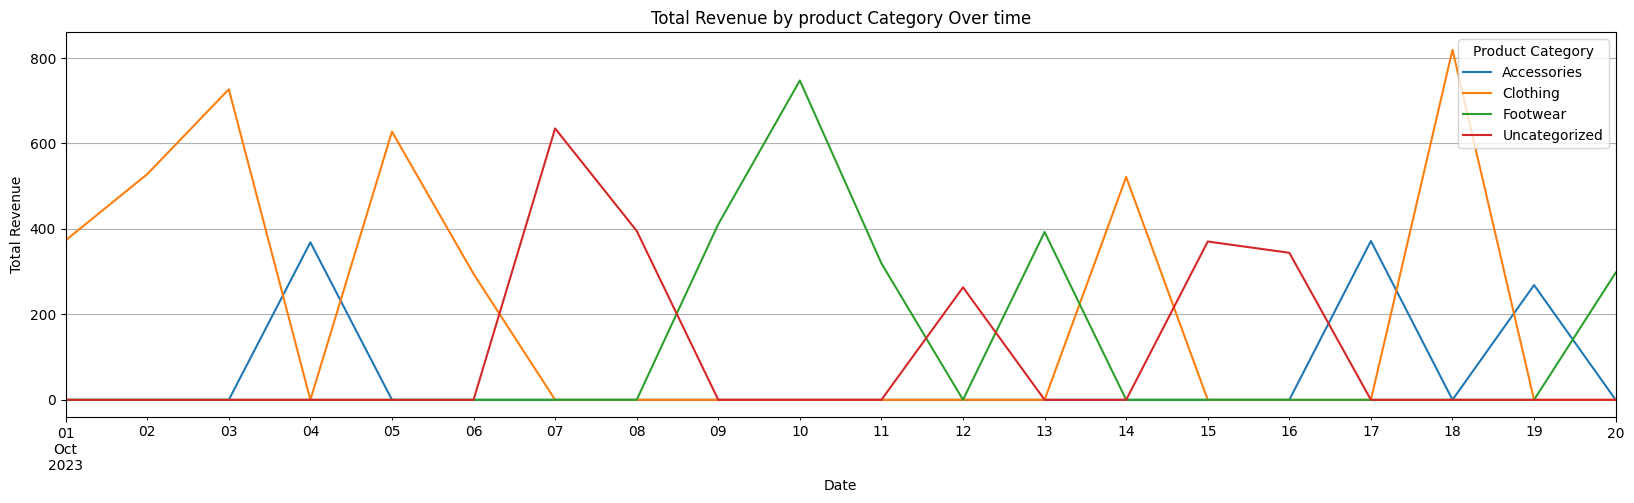

In [161]:
import matplotlib.pyplot as plt
pivot_table = df.pivot_table(values = 'Total_Revenue', index=df.index, columns='Product_Category', aggfunc='sum',fill_value=0)
pivot_table.plot(kind='line', figsize = (20,5))
plt.title('Total Revenue by product Category Over time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(title = 'Product Category')
plt.grid(True)
plt.show()

In [162]:
np.random.seed(42)
marketing_data = {
    'Transaction_ID': [101, 103, 105, 107, 110, 115],
    'Discount_Applied': [0.10, 0.20, 0.05, 0.15, 0.25, 0.10],
    'Promo_Code': ['SAVE10', 'SAVE20', 'ECO5', 'FREESHIP', 'VIP25', 'SAVE10']
}
marketing_df = pd.DataFrame(marketing_data)

In [163]:
marketing_df.head()

,Transaction_ID,Discount_Applied,Promo_Code
0,101,0.10,SAVE10
1,103,0.20,SAVE20
2,105,0.05,ECO5
3,107,0.15,FREESHIP
4,110,0.25,VIP25


In [164]:
df_merge = df.merge(marketing_df, on ='Transaction_ID', how= 'left')
df_merge.head()

,Transaction_ID,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue,Performance_Label,Performance_Label_np,Discount_Applied,Promo_Code
0,101,Clothing,7.0,53.33,4,373.31,Standard,Standard,0.10,SAVE10
1,102,Clothing,8.0,66.03,4,528.24,Standard,Standard,NaN,NaN
2,103,Clothing,10.0,72.69,3,726.90,Standard,Standard,0.20,SAVE20
3,104,Accessories,7.0,52.67,3,368.69,Standard,Standard,NaN,NaN
4,105,Clothing,8.0,78.47,5,627.76,Elite,Elite,0.05,ECO5


In [165]:
df_merge[['Discount_Applied','Promo_Code']] = df_merge[['Discount_Applied','Promo_Code']].fillna(0)

In [166]:
df_merge.head()

,Transaction_ID,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue,Performance_Label,Performance_Label_np,Discount_Applied,Promo_Code
0,101,Clothing,7.0,53.33,4,373.31,Standard,Standard,0.10,SAVE10
1,102,Clothing,8.0,66.03,4,528.24,Standard,Standard,0.00,0
2,103,Clothing,10.0,72.69,3,726.90,Standard,Standard,0.20,SAVE20
3,104,Accessories,7.0,52.67,3,368.69,Standard,Standard,0.00,0
4,105,Clothing,8.0,78.47,5,627.76,Elite,Elite,0.05,ECO5


In [167]:
print(df_merge.corr(numeric_only=True)['Discount_Applied']['Customer_Rating'])

0.26673253468463226


In [168]:
df_merge.groupby('Promo_Code')['Total_Revenue'].sum()

,Total_Revenue
Promo_Code,
0,5597.09
ECO5,627.76
FREESHIP,635.22
SAVE10,743.87
SAVE20,726.90
VIP25,747.45


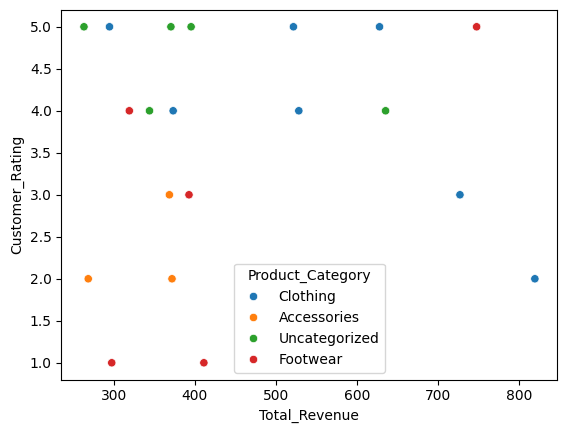

In [169]:
import seaborn as sns
sns.scatterplot(data=df_merge, x='Total_Revenue', y='Customer_Rating', hue = 'Product_Category')
plt.show()

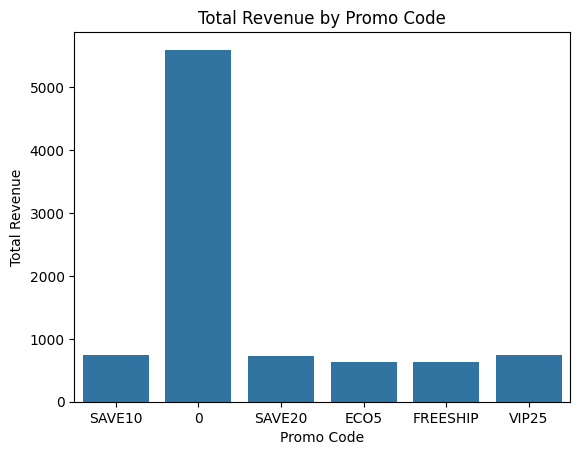

In [170]:
sns.barplot(data=df_merge, x='Promo_Code', y='Total_Revenue', errorbar=None, estimator='sum')
plt.title('Total Revenue by Promo Code')
plt.xlabel('Promo Code')
plt.ylabel('Total Revenue')
plt.show()

In [171]:
df_ml = pd.get_dummies(df_merge, columns=['Product_Category'], drop_first= True)

In [172]:
df_ml.head()

,Transaction_ID,Units_Sold,Unit_Price,Customer_Rating,Total_Revenue,Performance_Label,Performance_Label_np,Discount_Applied,Promo_Code,Product_Category_Clothing,Product_Category_Footwear,Product_Category_Uncategorized
0,101,7.0,53.33,4,373.31,Standard,Standard,0.10,SAVE10,True,False,False
1,102,8.0,66.03,4,528.24,Standard,Standard,0.00,0,True,False,False
2,103,10.0,72.69,3,726.90,Standard,Standard,0.20,SAVE20,True,False,False
3,104,7.0,52.67,3,368.69,Standard,Standard,0.00,0,False,False,False
4,105,8.0,78.47,5,627.76,Elite,Elite,0.05,ECO5,True,False,False


In [173]:
y= df_ml['Total_Revenue']
X = df_ml.drop(columns=['Total_Revenue', 'Performance_Label', 'Performance_Label_np', 'Promo_Code', 'Transaction_ID'])

In [174]:
X.head()

,Units_Sold,Unit_Price,Customer_Rating,Discount_Applied,Product_Category_Clothing,Product_Category_Footwear,Product_Category_Uncategorized
0,7.0,53.33,4,0.10,True,False,False
1,8.0,66.03,4,0.00,True,False,False
2,10.0,72.69,3,0.20,True,False,False
3,7.0,52.67,3,0.00,False,False,False
4,8.0,78.47,5,0.05,True,False,False


In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"The mean squared error is {mean_squared_error(y_test, y_pred):2f}")
print(f"The r2 Score is {r2_score(y_test, y_pred):2f}")
print(f"The mean root sqaured error is {mean_squared_error(y_test, y_pred)**(1/2):2f} ")

The mean squared error is 888.876939
The r2 Score is 0.974963
The mean root sqaured error is 29.814039 


Reason of such high MAE could be because of below reason
1. Small Sample of Dataset
2. Outliers in the data
3. Assuming the data is linear

To further validate, we have to check few parameters such as
Residuals, Feature Importance

<Axes: xlabel='Total_Revenue', ylabel='Total_Revenue'>

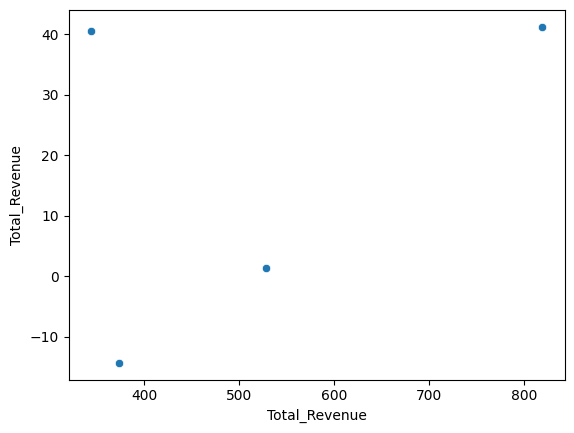

In [178]:
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)

In [179]:
coeff = pd.DataFrame(lr.coef_,X.columns, columns=['Coefficients'])
coeff

,Coefficients
Units_Sold,119.268437
Unit_Price,129.716209
Customer_Rating,-4.781470
Discount_Applied,14.102454
Product_Category_Clothing,8.012197
Product_Category_Footwear,-10.325336
Product_Category_Uncategorized,-4.474379


In [180]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, scaler.fit_transform(X),y,cv=5, scoring='r2')
print(f"All Five scores {scores}")

All Five scores [0.9071356  0.98747204 0.84686987 0.15622114 0.98470441]


The mean squared error is 32009.197259
The r2 Score is 0.098407


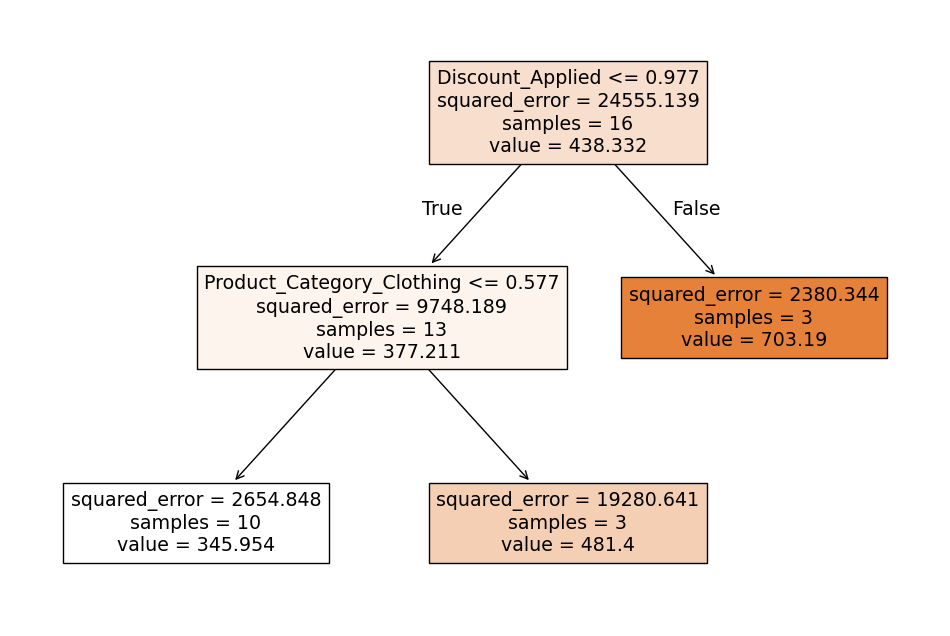

In [181]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
dt = DecisionTreeRegressor(max_depth=2, min_samples_leaf=3, random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(f"The mean squared error is {mean_squared_error(y_test, y_pred_dt):2f}")
print(f"The r2 Score is {r2_score(y_test, y_pred_dt):2f}")
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

In [182]:
scores = cross_val_score(dt, scaler.fit_transform(X),y,cv=5, scoring='r2')
print(f"All Five scores {scores}")

All Five scores [ 0.76295344  0.2395787   0.6351319  -1.92760939  0.02363811]


In [183]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler



In [184]:
df_merge
X_n=df_merge.drop(columns=['Total_Revenue', 'Performance_Label', 'Performance_Label_np', 'Promo_Code', 'Transaction_ID'])
y_n=df_merge['Total_Revenue']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

Create a Pipeline to impute, scale and onehotcode the train and test set

In [185]:
X_train_n.head()

,Product_Category,Units_Sold,Unit_Price,Customer_Rating,Discount_Applied
8,Footwear,8.0,51.40,1,0.0
5,Clothing,7.0,42.12,5,0.0
11,Uncategorized,4.0,65.84,5,0.0
3,Accessories,7.0,52.67,3,0.0
18,Accessories,8.0,33.58,2,0.0


The mean sqaured error is 888.8769386408879
The r2 Score is 0.9749632744882732


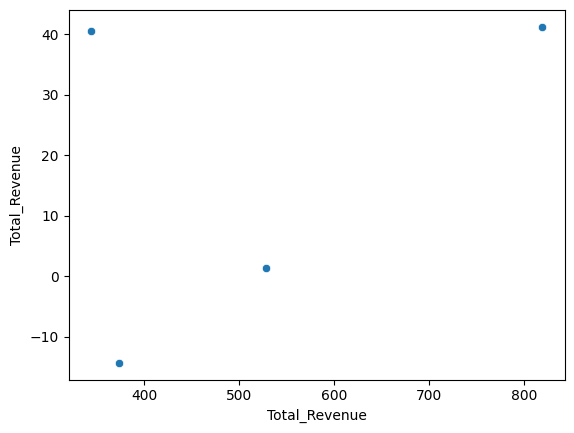

In [189]:
numeric_features = ['Units_Sold', 'Unit_Price','Customer_Rating','Discount_Applied']
categorical_features = ['Product_Category']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)])
clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
clf.fit(X_train_n, y_train_n)
y_pred = clf.predict(X_test_n)
residuals = y_test_n - y_pred
sns.scatterplot(x=y_test_n, y=residuals)
print(f"The mean sqaured error is {mean_squared_error(y_test_n, y_pred)}")
print(f"The r2 Score is {r2_score(y_test_n, y_pred)}")

In [190]:
import joblib
joblib.dump(clf, 'ecostyle_model.pkl')

['ecostyle_model.pkl']

In [191]:
model = joblib.load('ecostyle_model.pkl')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Units_Sold', 'Unit_Price',
                                                   'Customer_Rating',
                                                   'Discount_Applied']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Category'])])),
                ('regressor', LinearRegression())])